In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
file_path = r"microsoft.xlsx"
df = pd.read_excel(file_path, index_col = 'date', parse_dates = True)
close = df[['4. close']]
close

,4. close
date,
2020-05-05,180.76
2020-05-06,182.54
2020-05-07,183.60
2020-05-08,184.68
2020-05-11,186.74
...,...
2020-09-18,200.39
2020-09-21,202.54
2020-09-22,207.42


In [3]:
import math
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

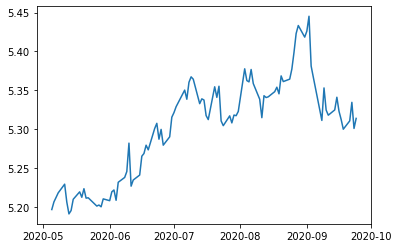

In [4]:
lnclose = np.log(close)
lnclose
plt.plot(lnclose)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


<Figure size 4320x720 with 0 Axes>

<Figure size 4320x720 with 0 Axes>

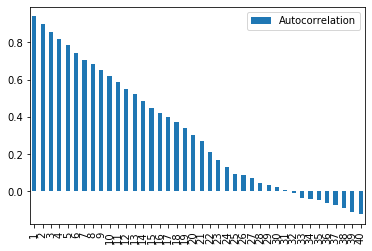

In [5]:
plt.figure(figsize = (60,10))
a = acf(lnclose)[1:100]
test_df = pd.DataFrame([a]).T

test_df.columns = ['Autocorrelation']
plt.figure(figsize = (60,10))
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

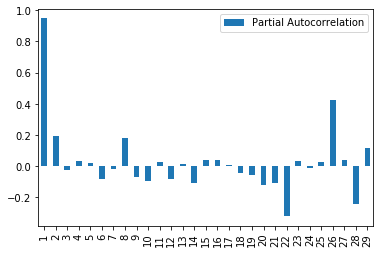

In [6]:
p = pacf(lnclose)[1:30]
test_df = pd.DataFrame([p]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

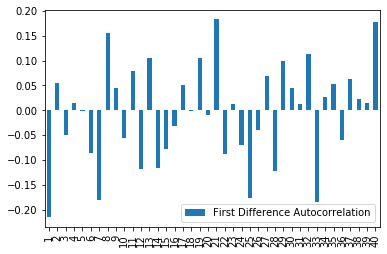

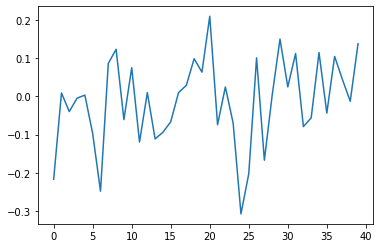

In [7]:
result = ts.adfuller(lnclose, 1)
result
lnclose_diff = lnclose-lnclose.shift()
diff = lnclose_diff.dropna()
a_diff = acf(diff)[1:100]
test_df = pd.DataFrame([a_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
p_diff = pacf(diff)[1:100]
plt.figure()
plt.plot(p_diff)
plt.show()

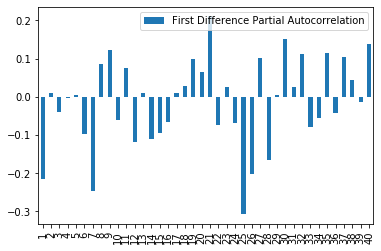

In [8]:
test_df = pd.DataFrame([p_diff]).T
test_df.columns = ['First Difference Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

predicted=180.533434
predicted=180.306869
predicted=180.080303
predicted=179.853737
predicted=179.627172
predicted=179.400606
predicted=179.174040
predicted=178.947475
predicted=178.720909
predicted=178.494343


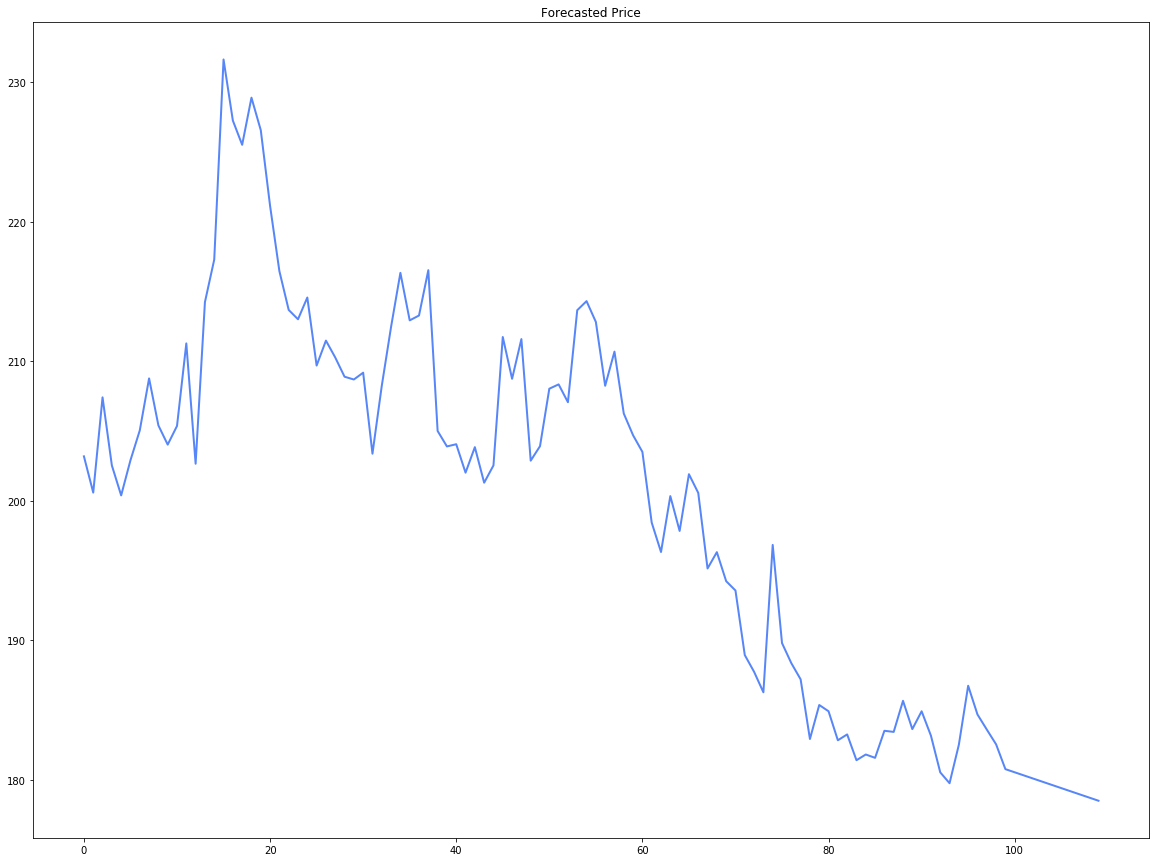

In [17]:
# close_matrix = lnclose.to_numpy()
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (20,15))
plt.plot(history, color = '#5786f8', lw = 2)
plt.title('Forecasted Price')
plt.show()

predicted=180.533434
predicted=180.306869
predicted=180.080303
predicted=179.853737
predicted=179.627172
predicted=179.400606
predicted=179.174040
predicted=178.947475
predicted=178.720909
predicted=178.494343


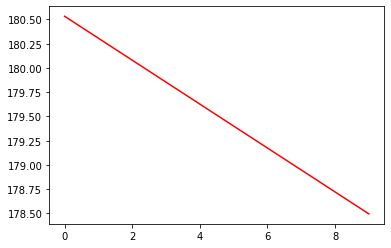

In [10]:
X = close.values
# size = int(len(X) * 1)
# train, test = X[0:size], X[size:len(X)]
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.3f' % error)
# # plot
# plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [27]:
# open
opening = df[['1. open']]
opening

,1. open
date,
2020-05-05,180.62
2020-05-06,182.08
2020-05-07,184.17
2020-05-08,184.98
2020-05-11,183.15
...,...
2020-09-18,202.80
2020-09-21,197.19
2020-09-22,205.06


predicted=200.044242
predicted=200.238485
predicted=200.432727
predicted=200.626970
predicted=200.821212
predicted=201.015455
predicted=201.209697
predicted=201.403939
predicted=201.598182
predicted=201.792424


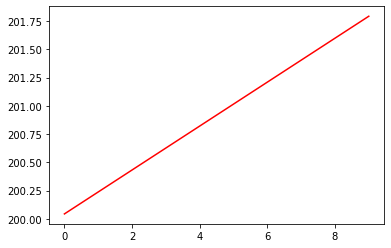

In [28]:
X = opening.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.plot(predictions, color='red')
plt.show()

In [30]:
# high
high = df[['2. high']]
high

,2. high
date,
2020-05-05,183.65
2020-05-06,184.20
2020-05-07,184.55
2020-05-08,185.00
2020-05-11,187.51
...,...
2020-09-18,203.65
2020-09-21,202.71
2020-09-22,208.10


[205.79141414]
[206.01282828]
[206.23424242]
[206.45565657]
[206.67707071]
[206.89848485]
[207.11989899]
[207.34131313]
[207.56272727]
[207.78414141]


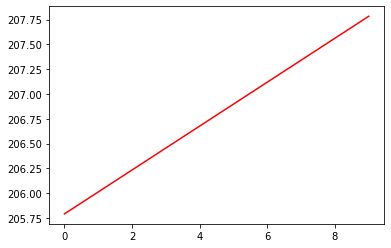

In [31]:
X = high.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print( (yhat))
plt.plot(predictions, color='red')
plt.show()

In [33]:
# low
low = df[['3. low']]
low

,3. low
date,
2020-05-05,179.900
2020-05-06,181.630
2020-05-07,182.580
2020-05-08,183.360
2020-05-11,182.850
...,...
2020-09-18,196.250
2020-09-21,196.380
2020-09-22,202.075


[199.39494949]
[199.58989899]
[199.78484848]
[199.97979798]
[200.17474747]
[200.36969697]
[200.56464646]
[200.75959596]
[200.95454545]
[201.14949495]


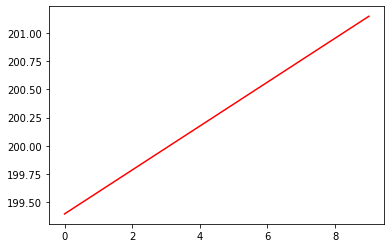

In [34]:
X = low.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print( (yhat))
plt.plot(predictions, color='red')
plt.show()

predicted=203.416566
predicted=203.643131
predicted=203.869697
predicted=204.096263
predicted=204.322828
predicted=204.549394
predicted=204.775960
predicted=205.002525
predicted=205.229091
predicted=205.455657


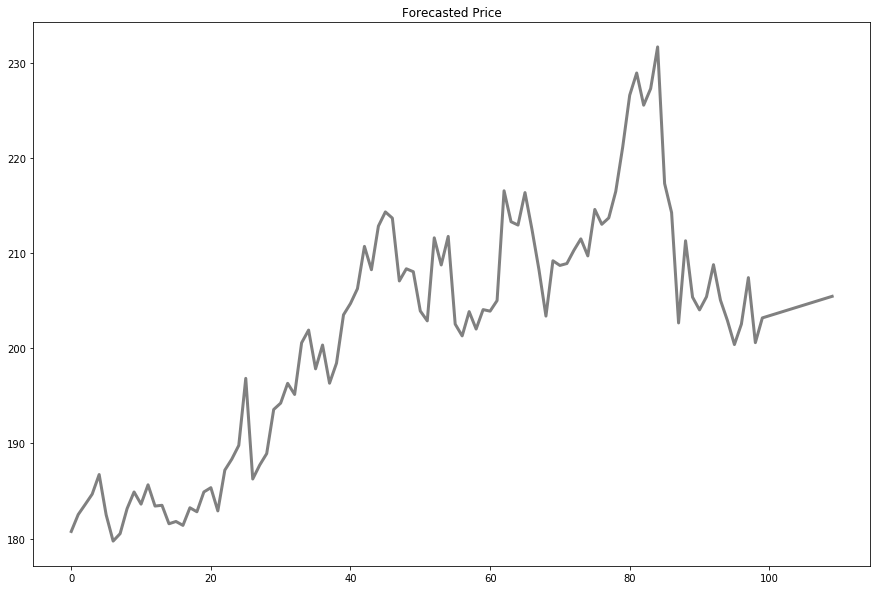

In [54]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
#     predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'grey', lw = 3)
plt.title('Forecasted Price')
plt.show()

predicted=200.044242
predicted=200.238485
predicted=200.432727
predicted=200.626970
predicted=200.821212
predicted=201.015455
predicted=201.209697
predicted=201.403939
predicted=201.598182
predicted=201.792424


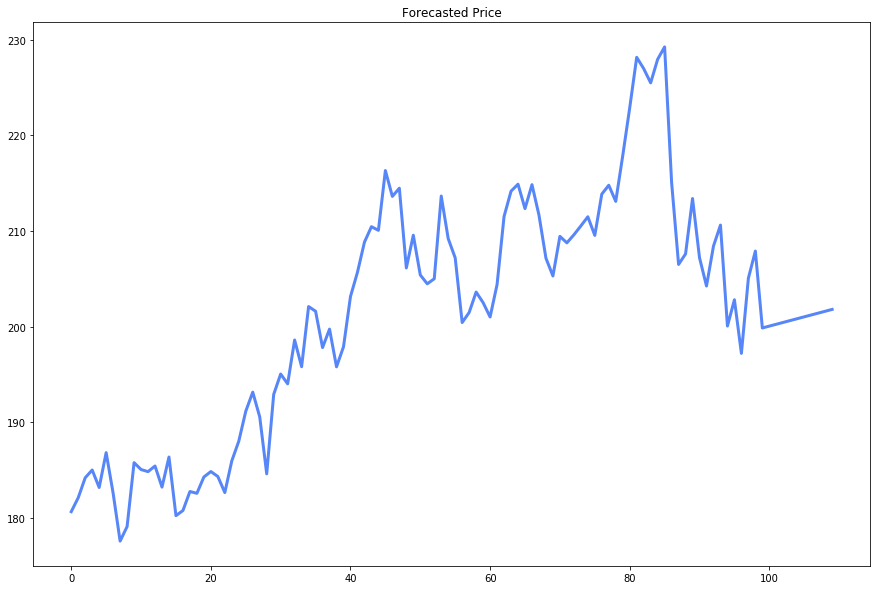

In [51]:
X = opening.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
#     predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = '#5786f8', lw = 3)
plt.title('Forecasted Price')
plt.show()

predicted=205.791414
predicted=206.012828
predicted=206.234242
predicted=206.455657
predicted=206.677071
predicted=206.898485
predicted=207.119899
predicted=207.341313
predicted=207.562727
predicted=207.784141


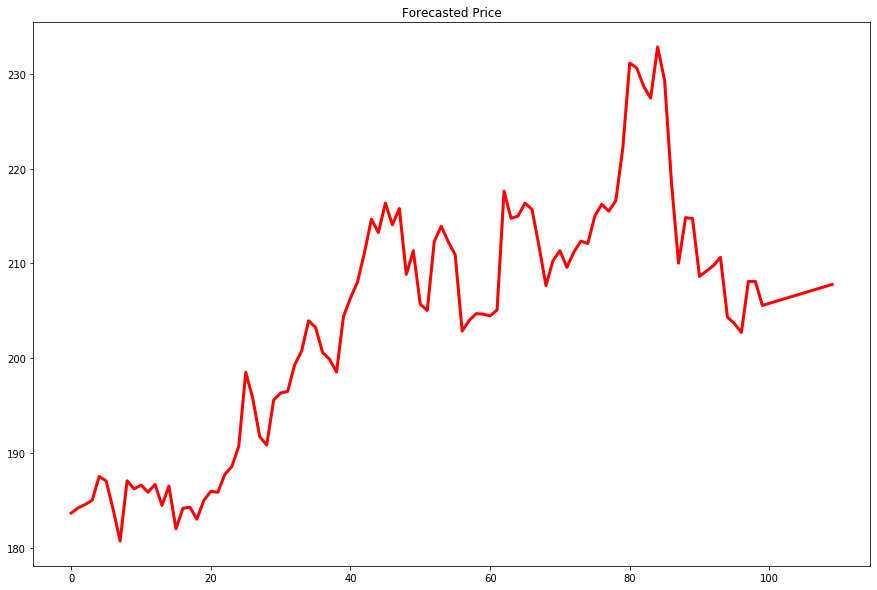

In [55]:
X = high.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
#     predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'r', lw = 3)
plt.title('Forecasted Price')
plt.show()

predicted=199.394949
predicted=199.589899
predicted=199.784848
predicted=199.979798
predicted=200.174747
predicted=200.369697
predicted=200.564646
predicted=200.759596
predicted=200.954545
predicted=201.149495


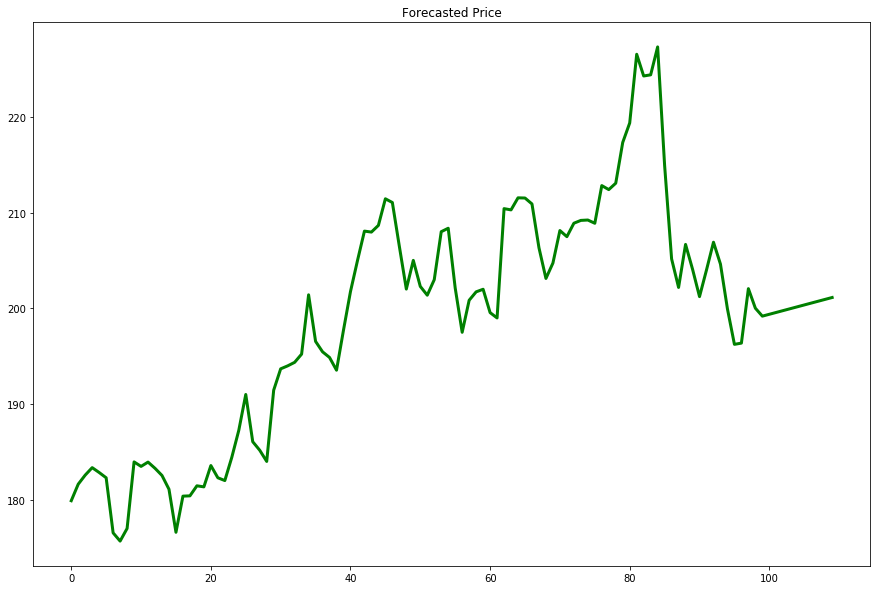

In [56]:
X = low.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
#     predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'g', lw = 3)
plt.title('Forecasted Price')
plt.show()